In [2]:
import numpy as np
import pandas as pd
from scipy.stats import mode, rankdata

In [59]:
data = pd.read_csv('food_data.csv', sep='\t', header=None)

In [60]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4.0,NaN,NaN,NaN,9,5.0,NaN,NaN,NaN,NaN,3.0,9,7,7,6.0
1,2.0,6.0,4.0,8.0,7,4.0,3.0,3.0,NaN,4.0,6.0,3,4,7,2.0
2,5.0,1.0,5.0,5.0,4,3.0,8.0,4.0,2.0,3.0,5.0,5,6,4,NaN
3,7.0,7.0,2.0,3.0,2,8.0,4.0,6.0,3.0,5.0,NaN,6,5,2,1.0
4,NaN,2.0,7.0,2.0,6,7.0,5.0,5.0,7.0,NaN,7.0,7,8,6,NaN
5,3.0,4.0,1.0,9.0,5,NaN,1.0,1.0,6.0,6.0,1.0,2,2,5,4.0
6,NaN,3.0,3.0,NaN,1,2.0,6.0,2.0,1.0,1.0,2.0,8,9,1,5.0
7,6.0,5.0,8.0,4.0,8,1.0,7.0,7.0,4.0,7.0,NaN,1,1,8,NaN
8,1.0,8.0,6.0,1.0,3,6.0,2.0,8.0,5.0,2.0,4.0,4,3,3,3.0


In [61]:
arr_mean = []
arr_mod  = []
arr_nan  = []

for i, row in data.iterrows():
    arr_mean.append(row.mean())
    arr_mod.append(mode(row.values)[0][0])
    arr_nan.append(row.count())
    
data['mean'] = arr_mean
data['mod'] = arr_mod
data['prop_nnan'] = (15 - np.array(arr_mean))/15

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,mean,mod,prop_nnan
0,4.0,NaN,NaN,NaN,9,5.0,NaN,NaN,NaN,NaN,3.0,9,7,7,6.0,6.250000,7.0,0.583333
1,2.0,6.0,4.0,8.0,7,4.0,3.0,3.0,NaN,4.0,6.0,3,4,7,2.0,4.500000,4.0,0.700000
2,5.0,1.0,5.0,5.0,4,3.0,8.0,4.0,2.0,3.0,5.0,5,6,4,NaN,4.285714,5.0,0.714286
3,7.0,7.0,2.0,3.0,2,8.0,4.0,6.0,3.0,5.0,NaN,6,5,2,1.0,4.357143,2.0,0.709524
4,NaN,2.0,7.0,2.0,6,7.0,5.0,5.0,7.0,NaN,7.0,7,8,6,NaN,5.750000,7.0,0.616667
5,3.0,4.0,1.0,9.0,5,NaN,1.0,1.0,6.0,6.0,1.0,2,2,5,4.0,3.571429,1.0,0.761905
6,NaN,3.0,3.0,NaN,1,2.0,6.0,2.0,1.0,1.0,2.0,8,9,1,5.0,3.384615,1.0,0.774359
7,6.0,5.0,8.0,4.0,8,1.0,7.0,7.0,4.0,7.0,NaN,1,1,8,NaN,5.153846,1.0,0.656410
8,1.0,8.0,6.0,1.0,3,6.0,2.0,8.0,5.0,2.0,4.0,4,3,3,3.0,3.933333,3.0,0.737778


In [64]:
rankdata(data['mean'] * data['mod'] * data["prop_nnan"])

array([9., 6., 7., 4., 8., 2., 1., 3., 5.])

---

In [5]:
data_experts = pd.read_csv('experts_data.csv', sep='\t')

In [6]:
data_experts

,Имя,Устрицы,Арахиc соленый,"Молоко 2,5%",Макароны,Овсяное молоко 3.2%,Шоколад,"Сырок ""РОСТАГРОЭКСПОРТ"" творожный глазированный с ""Варенкой""",Кефир 3.2%,Гречневая крупа
0,Вареник Наталия,9,4,5,6,8,2,1,7,3
1,Григорьев Алексей,9,4,5,6,7,1,2,8,3
2,Алсаханова,7,3,5,6,9,2,1,8,4
3,Мокров Петр,9,4,5,6,7,2,1,8,3
4,Савельев Николай,8,7,4,2,6,5,1,9,3
5,Исламов Рустем,9,3,8,4,5,1,6,7,2
6,Филатов Андрей,7,5,3,4,8,2,1,9,6
7,Бишук Антон,9,6,7,4,8,2,1,3,5
8,Гребенькова Ольга,8,5,3,7,4,1,2,6,9
9,Вайсер Кирилл,7,6,9,2,4,8,3,5,1


In [7]:
import matplotlib.pyplot as plt

In [20]:
grades = {}
for i in range(len(data_experts)):
    row = data_experts.iloc[i].values
    grades[row[0]] = list(row[1:])

In [21]:
grades

{'Вареник Наталия ': [9, 4, 5, 6, 8, 2, 1, 7, 3],
 'Григорьев Алексей': [9, 4, 5, 6, 7, 1, 2, 8, 3],
 'Алсаханова': [7, 3, 5, 6, 9, 2, 1, 8, 4],
 'Мокров Петр': [9, 4, 5, 6, 7, 2, 1, 8, 3],
 'Савельев Николай': [8, 7, 4, 2, 6, 5, 1, 9, 3],
 'Исламов Рустем': [9, 3, 8, 4, 5, 1, 6, 7, 2],
 'Филатов Андрей': [7, 5, 3, 4, 8, 2, 1, 9, 6],
 'Бишук Антон': [9, 6, 7, 4, 8, 2, 1, 3, 5],
 'Гребенькова Ольга': [8, 5, 3, 7, 4, 1, 2, 6, 9],
 'Вайсер Кирилл': [7, 6, 9, 2, 4, 8, 3, 5, 1],
 'Панченко Святослав': [8, 4, 5, 6, 9, 3, 1, 7, 2],
 'Панкратов Виктор': [8, 9, 5, 6, 7, 1, 2, 4, 3],
 'Харь Александра': [8, 7, 4, 2, 6, 5, 1, 9, 3],
 'Северилов': [7, 1, 4, 9, 6, 3, 5, 2, 8],
 'Гунаев': [9, 4, 5, 6, 7, 2, 3, 8, 4],
 'Шокоров': [9, 3, 1, 7, 4, 8, 6, 2, 5],
 'Жолобов Владимир': [9, 4, 5, 6, 8, 1, 2, 7, 3],
 'Филиппова ': [9, 4, 3, 3, 7, 3, 2, 4, 6],
 'Гришанов': [9, 5, 4, 8, 6, 1, 2, 7, 3],
 'Волынцев': [9, 4, 3, 5, 8, 6, 1, 7, 2],
 'Тихонов': [9, 4, 5, 8, 7, 2, 1, 6, 3]}

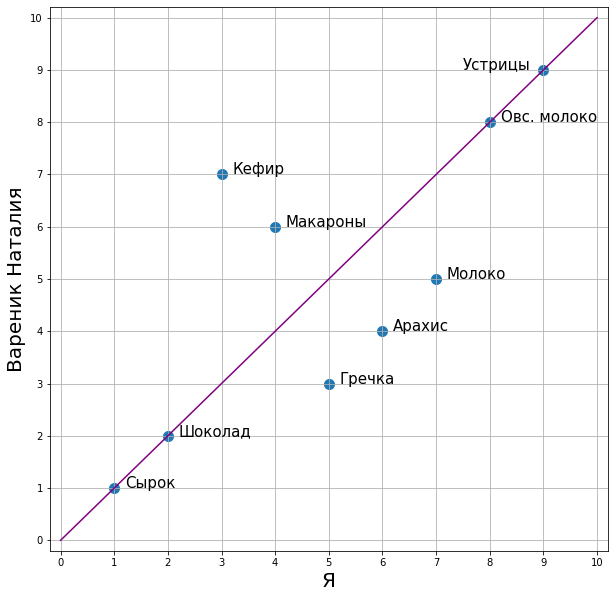

In [38]:
plt.figure(figsize=[10,10])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter(grades['Бишук Антон'], grades['Вареник Наталия '], s=100)
plt.plot([0,10],[0,10], color='purple')
plt.xlabel('Я', fontsize=20)
plt.ylabel('Вареник Наталия', fontsize=20)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 1.0, 'Сырок', fontsize=15)
plt.text(2.2, 2.0, 'Шоколад', fontsize=15)
plt.text(5.2, 3.0, 'Гречка', fontsize=15)
plt.text(4.2, 6.0, 'Макароны', fontsize=15)
plt.text(7.2, 5.0, 'Молоко', fontsize=15)
plt.text(6.2, 4.0, 'Арахис', fontsize=15)
plt.text(3.2, 7, 'Кефир', fontsize=15)
plt.text(8.2, 8, 'Овс. молоко', fontsize=15)
plt.text(7.5, 9.0, 'Устрицы', fontsize=15)
plt.grid()


In [46]:
grades

{'Вареник Наталия ': [9, 4, 5, 6, 8, 2, 1, 7, 3],
 'Григорьев Алексей': [9, 4, 5, 6, 7, 1, 2, 8, 3],
 'Алсаханова': [7, 3, 5, 6, 9, 2, 1, 8, 4],
 'Мокров Петр': [9, 4, 5, 6, 7, 2, 1, 8, 3],
 'Савельев Николай': [8, 7, 4, 2, 6, 5, 1, 9, 3],
 'Исламов Рустем': [9, 3, 8, 4, 5, 1, 6, 7, 2],
 'Филатов Андрей': [7, 5, 3, 4, 8, 2, 1, 9, 6],
 'Бишук Антон': [9, 6, 7, 4, 8, 2, 1, 3, 5],
 'Гребенькова Ольга': [8, 5, 3, 7, 4, 1, 2, 6, 9],
 'Вайсер Кирилл': [7, 6, 9, 2, 4, 8, 3, 5, 1],
 'Панченко Святослав': [8, 4, 5, 6, 9, 3, 1, 7, 2],
 'Панкратов Виктор': [8, 9, 5, 6, 7, 1, 2, 4, 3],
 'Харь Александра': [8, 7, 4, 2, 6, 5, 1, 9, 3],
 'Северилов': [7, 1, 4, 9, 6, 3, 5, 2, 8],
 'Гунаев': [9, 4, 5, 6, 7, 2, 3, 8, 4],
 'Шокоров': [9, 3, 1, 7, 4, 8, 6, 2, 5],
 'Жолобов Владимир': [9, 4, 5, 6, 8, 1, 2, 7, 3],
 'Филиппова ': [9, 4, 3, 3, 7, 3, 2, 4, 6],
 'Гришанов': [9, 5, 4, 8, 6, 1, 2, 7, 3],
 'Волынцев': [9, 4, 3, 5, 8, 6, 1, 7, 2],
 'Тихонов': [9, 4, 5, 8, 7, 2, 1, 6, 3]}

In [29]:
list(data_experts.columns)[1:]

['Устрицы',
 'Арахиc соленый',
 'Молоко 2,5%',
 'Макароны',
 'Овсяное молоко 3.2%',
 'Шоколад ',
 'Сырок "РОСТАГРОЭКСПОРТ" творожный глазированный с "Варенкой" ',
 'Кефир 3.2%',
 'Гречневая крупа']

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

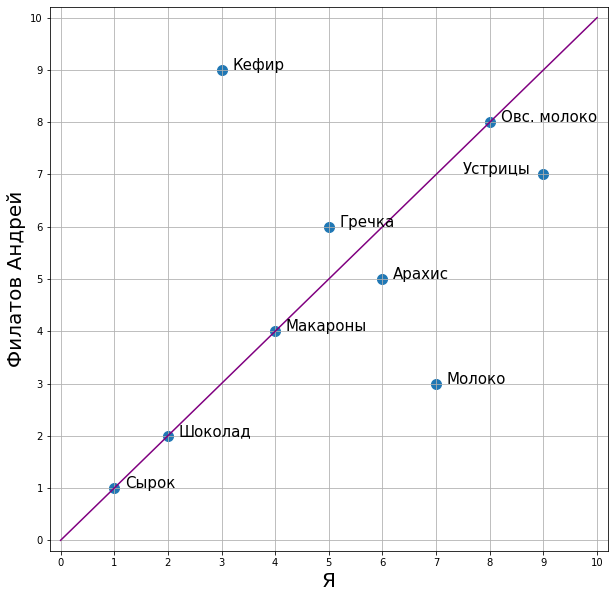

In [54]:

plt.figure(figsize=[10,10])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter(grades['Бишук Антон'], grades['Филатов Андрей'], s=100)
plt.plot([0,10],[0,10], color='purple')
plt.xlabel('Я', fontsize=20)
plt.ylabel('Филатов Андрей', fontsize=20)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 1.0, 'Сырок', fontsize=15)
plt.text(2.2, 2.0, 'Шоколад', fontsize=15)
plt.text(5.2, 6.0, 'Гречка', fontsize=15)
plt.text(4.2, 4.0, 'Макароны', fontsize=15)
plt.text(7.2, 3.0, 'Молоко', fontsize=15)
plt.text(6.2, 5.0, 'Арахис', fontsize=15)
plt.text(3.2, 9, 'Кефир', fontsize=15)
plt.text(8.2, 8, 'Овс. молоко', fontsize=15)
plt.text(7.5, 7.0, 'Устрицы', fontsize=15)
plt.grid()
plt.plot